<a href="https://colab.research.google.com/github/adityapatil4141/Deep-learning/blob/main/Batch_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,BatchNormalization

In [46]:
df = pd.read_csv("/content/drive/MyDrive/work files /concertriccir2.csv")

In [47]:
df.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


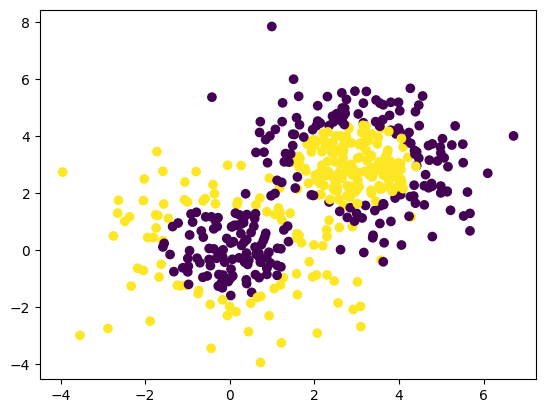

In [48]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [49]:
x = df.drop(columns='class')
y = df['class']

# Without using BatchNormalization

In [50]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [51]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
history = model.fit(x,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 1s 19ms/step - loss: 0.6938 - accuracy: 0.4700 - val_loss: 0.6919 - val_accuracy: 0.4300
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.4400 - val_loss: 0.6923 - val_accuracy: 0.4500
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.4075 - val_loss: 0.6928 - val_accuracy: 0.4800
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.4700 - val_loss: 0.6932 - val_accuracy: 0.6200
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5475 - val_loss: 0.6936 - val_accuracy: 0.4300
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5175 - val_loss: 0.6940 - val_accuracy: 0.4300
Epoch 7/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6929 - accuracy: 0.5175 - val_loss: 0.6945 - val_accuracy: 0.4300
Epoch 8/200


# Using BatchNormalization

In [53]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 3)                 9         
                                                                 
 batch_normalization_4 (Bat  (None, 3)                 12        
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 2)                 8         
                                                                 
 batch_normalization_5 (Bat  (None, 2)                 8         
 chNormalization)                                                
                                                                 
 dense_23 (Dense)            (None, 1)                 3         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 30 (1

In [54]:
model.compile(loss='binary_crossentropy',optimizer ='adam',metrics=['accuracy'])
history1 = model.fit(x,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 2s 28ms/step - loss: 0.8724 - accuracy: 0.4650 - val_loss: 1.0888 - val_accuracy: 0.4700
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.8766 - accuracy: 0.4550 - val_loss: 0.9820 - val_accuracy: 0.4200
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.8386 - accuracy: 0.4550 - val_loss: 0.9113 - val_accuracy: 0.3900
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.8369 - accuracy: 0.4475 - val_loss: 0.8550 - val_accuracy: 0.3900
Epoch 5/200
13/13 [==============================] - 0s 7ms/step - loss: 0.8097 - accuracy: 0.4775 - val_loss: 0.8156 - val_accuracy: 0.4200
Epoch 6/200
13/13 [==============================] - 0s 7ms/step - loss: 0.7930 - accuracy: 0.4800 - val_loss: 0.7765 - val_accuracy: 0.4200
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7834 - accuracy: 0.4900 - val_loss: 0.7500 - val_accuracy: 0.4400
Epoch 8/200


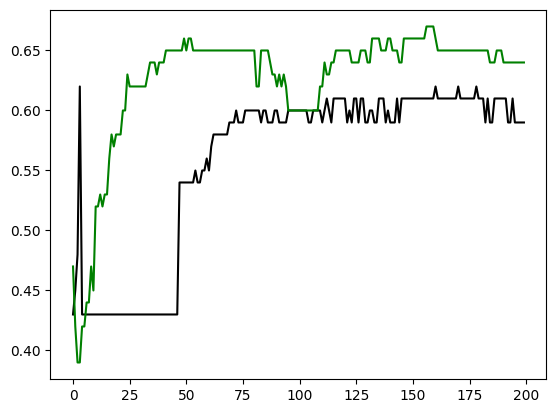

In [55]:
plt.plot(history.history['val_accuracy'],color='black')
plt.plot(history1.history['val_accuracy'],color='green')

In [ ]:
# We can see that model with batchnormalization requires less epochs to gain high accuracy